## Prepare train_data and test_data

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from hypergbm import make_experiment
from hypernets.tabular.metrics import metric_to_scoring
from sklearn.metrics import get_scorer
from zipfile import ZipFile

07-20 11:43:10 I hypernets.u._fsutils.py 300 - use /home/wumy/tmp/workdir as working directory.


In [2]:
train_data = pd.read_csv('datasets/Spambase/train.csv.gz')
test_data = pd.read_csv('datasets/Spambase/test.csv.gz')
X_train = train_data.copy()
y_train = X_train.pop('Spam')
X_test = test_data.copy()
y_test = X_test.pop('Spam')

# Check  correlation of features

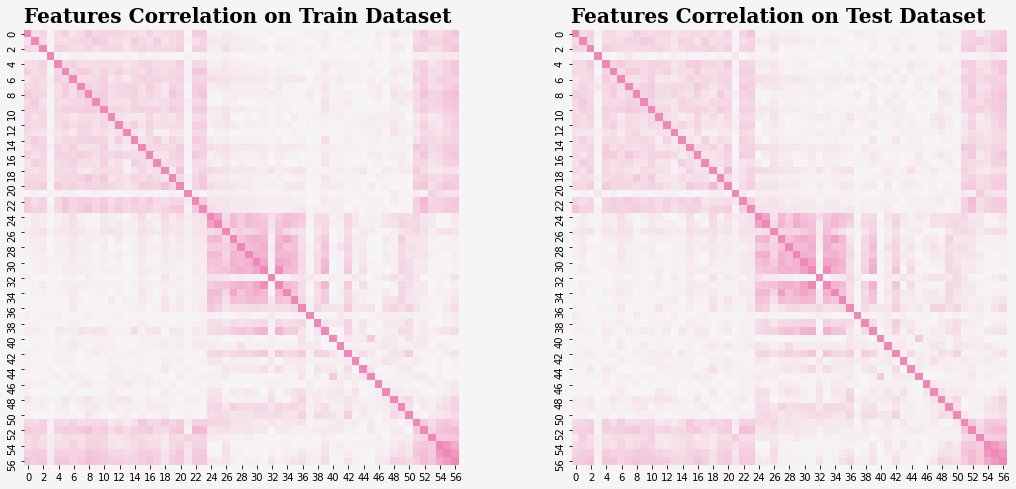

In [3]:
from scipy.stats import spearmanr
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

corr = spearmanr(X_train).correlation
corr_test = spearmanr(X_test).correlation

background_color = "#f6f5f5"
fig = plt.figure(figsize=(18, 8), facecolor=background_color)
gs = fig.add_gridspec(1, 2)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
colors = ["#f088b7", "#f6f5f5", "#f088b7"]
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)
ax0.set_facecolor(background_color)
ax0.text(0, -1, 'Features Correlation on Train Dataset', fontsize=20, fontweight='bold', fontfamily='serif')
ax1.set_facecolor(background_color)
ax1.text(-0.1, -1, 'Features Correlation on Test Dataset', fontsize=20, fontweight='bold', fontfamily='serif')

sns.heatmap(corr, ax=ax0, vmin=-1, vmax=1, annot=False, square=True,
            cbar_kws={"orientation": "horizontal"}, cbar=False, cmap=colormap, fmt='.1g')
sns.heatmap(corr_test, ax=ax1, vmin=-1, vmax=1, annot=False, square=True,
            cbar_kws={"orientation": "horizontal"}, cbar=False, cmap=colormap, fmt='.1g')
plt.show()


# Without collinearity_detection
_best_reward is 0.9682

### Input Data

,X_train.shape,y_train.shape,X_eval.shape,y_eval.shape,X_test.shape,Task
0,"(3677, 57)","(3677,)","(920, 57)","(920,)","(920, 57)",binary(2)


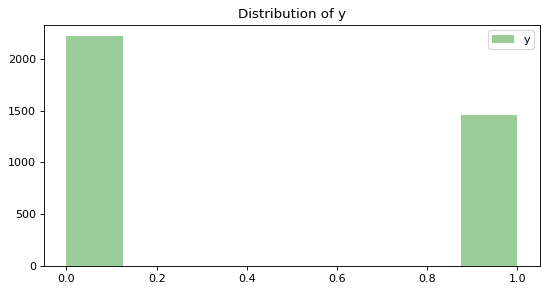

## Data Clean

### Initliazed parameters

,key,value
0,cv,False
1,data_cleaner_args,"{'nan_chars': None, 'correct_object_dtype': Tr..."
2,name,data_clean
3,random_state,8888
4,train_test_split_strategy,None


### Fitted parameters

,key,value
0,input_features,"[Word_freq_make, Word_freq_address, Word_freq_..."
1,selected_features,"[Word_freq_make, Word_freq_address, Word_freq_..."
2,unselected_features,[]
3,X_train.shape,"(3677, 57)"
4,y_train.shape,"(3677,)"
5,X_eval.shape,"(920, 57)"
6,y_eval.shape,"(920,)"
7,X_test.shape,"(920, 57)"
8,unselected_reason,{}
9,kept/dropped feature count,57/0


## Space Searching

### Initliazed parameters

,key,value
0,cv,False
1,name,space_searching
2,num_folds,3


#### Trials Summary:

,Trial No.,Previous reward,Best trial,Best reward,Total elapsed,Valid trials,Max trials
0,30,0.950725,26,0.960114,164.339814,28,30


#### Top trials:

,Trial No.,Reward,Elapsed,Space Vector
0,26,0.960114,1.550090,"[2, 0, 0, 2, 1, 0]"
1,9,0.958944,4.572766,"[2, 2, 0, 3, 3, 1]"
2,3,0.956395,2.799260,"[1, 2, 0, 0, 2, 1, 1, 0, 2, 1]"
3,10,0.956012,1.088279,"[2, 0, 0, 3, 0, 1]"
4,29,0.953488,9.187676,"[0, 2, 0, 2, 340, 2, 2, 0, 0]"


#### Best Trial:

key,value
signature,1eda647a850f9867b0cdd8fddfa2c686
vectors,"[2, 0, 0, 2, 1, 0]"
0-estimator_options.hp_or,2
1-numeric_imputer_0.strategy,mean
2-numeric_scaler_optional_0.hp_opt,False
3-Module_CatBoostEstimator_1.learning_rate,0.5
4-Module_CatBoostEstimator_1.depth,5
5-Module_CatBoostEstimator_1.l2_leaf_reg,None


### Fitted parameters

,key,value
0,input_features,"[Word_freq_make, Word_freq_address, Word_freq_..."
1,best_reward,1
2,history,<hypernets.core.trial.TrialHistory object at 0...


## Final Ensemble

### Initliazed parameters

,key,value
0,ensemble_size,20
1,name,final_ensemble
2,scorer,"make_scorer(precision_score, average=binary)"


### Fitted parameters

,0,1
0,weights,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,scores,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
2,best_stack,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,hits,{0: 20}
4,ensemble_size,20


In [4]:
experiment = make_experiment(train_data.copy(),eval_data=test_data.copy(),target='Spam', 
                             reward_metric='precision',pos_label=1,
                             random_state=8888,cv=False,early_stopping_rounds=0,
                             max_trials=30)
estimator = experiment.run()

In [5]:
scorer = get_scorer(metric_to_scoring('precision',pos_label=1))
score = scorer(estimator, X_test, y_test)
score

0.9682080924855492

# Use collinearity_detection
_best_reward is 1.0

### Input Data

,X_train.shape,y_train.shape,X_eval.shape,y_eval.shape,X_test.shape,Task
0,"(3677, 57)","(3677,)","(920, 57)","(920,)","(920, 57)",binary(2)


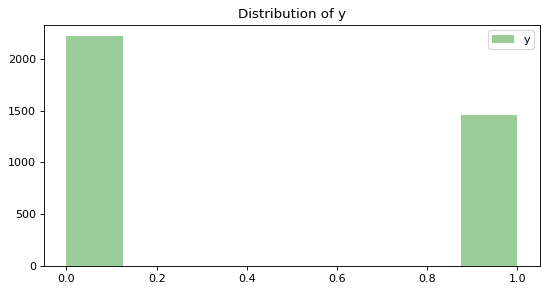

## Data Clean

### Initliazed parameters

,key,value
0,cv,False
1,data_cleaner_args,"{'nan_chars': None, 'correct_object_dtype': Tr..."
2,name,data_clean
3,random_state,8888
4,train_test_split_strategy,None


### Fitted parameters

,key,value
0,input_features,"[Word_freq_make, Word_freq_address, Word_freq_..."
1,selected_features,"[Word_freq_make, Word_freq_address, Word_freq_..."
2,unselected_features,[]
3,X_train.shape,"(3677, 57)"
4,y_train.shape,"(3677,)"
5,X_eval.shape,"(920, 57)"
6,y_eval.shape,"(920,)"
7,X_test.shape,"(920, 57)"
8,unselected_reason,{}
9,kept/dropped feature count,57/0


## Multicollinearity Detection

### Initliazed parameters

,key,value
0,name,multicollinearity_detection


### Fitted parameters

,key,value
0,input_features,"[Word_freq_make, Word_freq_address, Word_freq_..."
1,selected_features,"[Word_freq_make, Word_freq_address, Word_freq_..."
2,unselected_features,"[Word_freq_internet, Word_freq_order, Word_fre..."
3,feature_clusters,"[[Word_freq_make, Word_freq_order], [Word_freq..."
4,kept/dropped feature count,39/18


## Space Searching

### Initliazed parameters

,key,value
0,cv,False
1,name,space_searching
2,num_folds,3


#### Trials Summary:

,Trial No.,Previous reward,Best trial,Best reward,Total elapsed,Valid trials,Max trials
0,30,0.915452,28,1.0,317.971867,30,30


#### Top trials:

,Trial No.,Reward,Elapsed,Space Vector
0,28,1.000000,3.707965,"[0, 2, 0, 2, 210, 0, 0, 0, 3]"
1,24,0.985612,77.885796,"[0, 2, 1, 0, 290, 3, 0, 2, 2, 4]"
2,2,0.977099,22.364614,"[0, 1, 1, 1, 210, 1, 0, 2, 1, 2]"
3,19,0.943020,18.210408,"[0, 2, 0, 0, 390, 3, 3, 2, 3]"
4,13,0.936599,6.255431,"[1, 1, 1, 2, 3, 1, 0, 0, 2, 1, 0]"


#### Best Trial:

key,value
signature,541efd857751b207e901868fb0bc398b
vectors,"[0, 2, 0, 2, 210, 0, 0, 0, 3]"
0-estimator_options.hp_or,0
1-numeric_imputer_0.strategy,constant
2-numeric_scaler_optional_0.hp_opt,False
3-Module_LightGBMEstimator_1.boosting_type,goss
4-Module_LightGBMEstimator_1.num_leaves,210
5-Module_LightGBMEstimator_1.max_depth,3
6-Module_LightGBMEstimator_1.learning_rate,0.001
7-Module_LightGBMEstimator_1.reg_alpha,0.001


### Fitted parameters

,key,value
0,input_features,"[Word_freq_make, Word_freq_address, Word_freq_..."
1,best_reward,1
2,history,<hypernets.core.trial.TrialHistory object at 0...


## Final Ensemble

### Initliazed parameters

,key,value
0,ensemble_size,20
1,name,final_ensemble
2,scorer,"make_scorer(precision_score, average=binary)"


### Fitted parameters

,0,1
0,weights,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,scores,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
2,best_stack,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,hits,{0: 20}
4,ensemble_size,20


1.0

In [6]:
#kept/dropped feature count	39/18
experiment = make_experiment(train_data.copy(),eval_data=test_data.copy(), target='Spam', 
                             reward_metric='precision',pos_label=1,
                             random_state=8888,max_trials=30,cv=False,early_stopping_rounds=0,
                             collinearity_detection=True)
estimator = experiment.run()
scorer = get_scorer(metric_to_scoring('precision',pos_label=1))
score = scorer(estimator, X_test, y_test)
score